In [383]:
import cv2 as cv
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [384]:
# Reference websites I use for this homework:
# https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
# https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/
# https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
# https://www.geeksforgeeks.org/sift-scale-invariant-feature-transform/

def plot_image(image_1):

    plt.figure(figsize=(20,20))
    plt.subplot(1, 1, 1)
    plt.imshow(image_1)
    plt.show()

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def calculate_distance(v1, v2):
    return (v1**2+v2**2)**0.5

def calculate_angle(v1, v2):
    return np.arctan2(v1, v2)


In [385]:
# I uploaded the images to my github profile and I read them with the io.imread function.

img1 = io.imread("https://raw.githubusercontent.com/kgnylm/imagess/main/7.jpeg")
img2 = io.imread("https://raw.githubusercontent.com/kgnylm/imagess/main/8.jpeg")

img1 = cv.resize(img1, (512, 384))
img2 = cv.resize(img2, (512, 384))

grayscale1=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
grayscale2=cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [386]:
# I found the keypoints and descriptors with SIFT.
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(grayscale1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(grayscale2,None)

In [387]:
# I detect with cosine similarity.
#Reference website: https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/

matches_1 = []

matches2= []

for i in range(len(descriptors_1)):
    for j in range(len(descriptors_2)):
        similarity = cosine_similarity(descriptors_1[i], descriptors_2[j])
        if similarity > 0.97:
            matches_1.append(keypoints_1[i])
            matches2.append(keypoints_2[j])


In [388]:
# I append the all distances to the distance list.

distance =[]

for i in range(len(matches_1)):
    distance.append(calculate_distance((matches_1[i].pt)[0]-(matches2[i].pt[0]),(matches_1[i].pt)[1]-((matches2[i].pt[1])+img1.shape[1])))


In [389]:
# I append the acceptable distances to the good list.

good=[]

for i in range(len(distance)):
    if (distance[i]>=np.mean(distance)-60 and distance[i]<=np.mean(distance)+60):
        good.append([matches_1[i],matches2[i],distance[i]])

# I append the all angles to the angle list.

angle =[]

for i in range(len(good)):
    angle.append(calculate_angle((matches_1[i].pt)[0]-(matches2[i].pt[0]),(matches_1[i].pt)[1]-((matches2[i].pt[1])+img1.shape[1])))

# I append the acceptable angles to the final list.
# This way, there won't be lines at very different angles.
#Reference website: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
final=[]

for i in range(len(angle)):
    if (angle[i]>=np.mean(angle)-5 and angle[i]<=np.mean(angle)+5):
        final.append([matches_1[i],matches2[i],angle[i]])

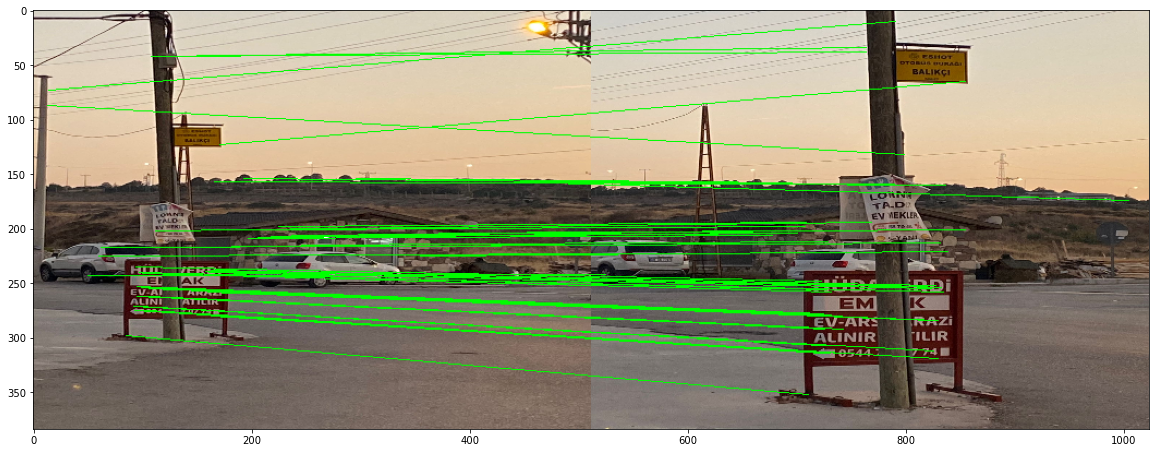

In [390]:
# I had a problem with the drawmatchesknn function. drawmatces function takes cv.DrawMatch type but my pixels are float type with (.pt) function.

img3=np.concatenate((img1,img2),axis=1)

# I drew lines with cv.line as long as the good list.

for i in range(len(final)):
    cv.line(img3, (int(final[i][0].pt[0]),int(final[i][0].pt[1])), (int(final[i][1].pt[0]+img1.shape[1]),int(final[i][1].pt[1])), (0,255,0), 1)
plot_image(img3)